# CIFAR-10 Dataset CNN

In this Project we will classify objects in CIFAR-10 dataset using CNNs.

We will be using 4 convolutional layer of stride 3 and 2 max pool layers of stride 2.

In [41]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torch.utils.data import sampler
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline


#Some defined variables
batch_size = 64
num_classes = 10
learning_rate = 0.001
num_epochs = 20

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [42]:
NUM_TRAIN = 49000
# Here we set up a transform to preprocess the data by subtracting the mean RGB value and dividing by the
# standard deviation of each RGB value; we've hardcoded the mean and std.

transform = transforms.Compose([transforms.Resize((32,32)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],std=[0.2023, 0.1994, 0.2010])])

# Create Training dataset
cifar10_train = dset.CIFAR10('./datasets', train=True, download=True,transform=transform)


# # Create Validation dataset
cifar10_val = dset.CIFAR10('./datasets', train=True, download=True,
                            transform=transform)
# Create Test dataset
cifar10_test = dset.CIFAR10('./datasets', train=False, download=True, 
                            transform=transform)

# Instantiate loader objects to facilitate processing
train_loader = DataLoader(cifar10_train, batch_size, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

val_loader = DataLoader(cifar10_val, batch_size, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

test_loader = DataLoader(cifar10_test, batch_size)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


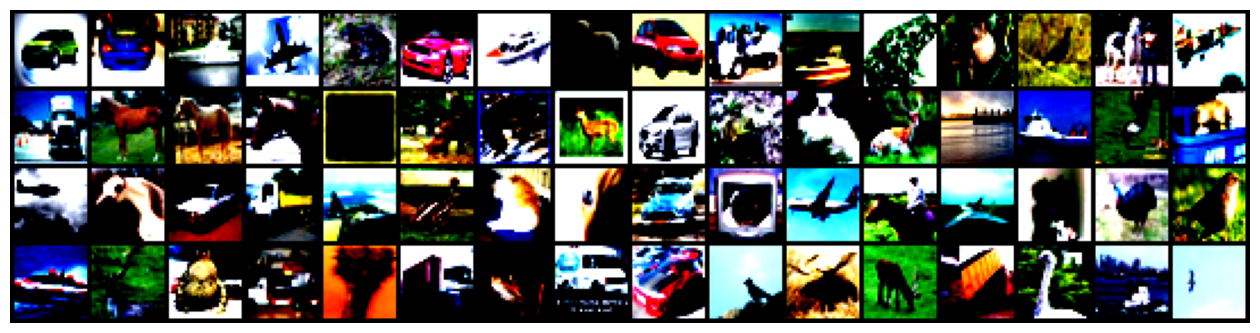

In [43]:
#To see the images in training set
for images, _ in train_loader:
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [44]:
# Creating a CNN class
class ConvNeuralNet(nn.Module):
#  Determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.conv_layer2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3)
        self.max_pool1 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.conv_layer3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.conv_layer4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3)
        self.max_pool2 = nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.fc1 = nn.Linear(1600, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    # Progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.conv_layer2(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer3(out)
        out = self.conv_layer4(out)
        out = self.max_pool2(out)
                
        out = out.reshape(out.size(0), -1)
        
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out
    
    def evaluate(model, val_loader):
        
        outputs = [model.forward(batch) for batch in val_loader]
        epoch_loss = torch.stack(batch_losses).mean()
        return model.validation_epoch_end(outputs)

In [45]:
#Moving the model to device
model = ConvNeuralNet(num_classes)
model = model.to(device)

# Setting Loss Function
criterion = nn.CrossEntropyLoss()

# Set optimizer with optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  

total_step = len(train_loader)

In [46]:

for epoch in range(num_epochs):
# Loading images and labels
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    #Validation
    val_batch_losses = []
    for i,(images,labels) in enumerate(val_loader):
        
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        val_batch_losses.append(loss)
        
    
    val_epoch_loss = torch.stack(val_batch_losses).mean()
        
        
    
    
    

    print('Epoch [{}/{}], Loss: {:.4f} Val_Loss:{:.4f}'.format(epoch+1, num_epochs, loss.item(),val_epoch_loss.item()))

Epoch [1/20], Loss: 1.8920 Val_Loss:1.6785
Epoch [2/20], Loss: 1.5548 Val_Loss:1.4539
Epoch [3/20], Loss: 1.1236 Val_Loss:1.3011
Epoch [4/20], Loss: 1.2121 Val_Loss:1.2198
Epoch [5/20], Loss: 1.0502 Val_Loss:1.1527
Epoch [6/20], Loss: 0.9583 Val_Loss:1.0822
Epoch [7/20], Loss: 1.0165 Val_Loss:1.0535
Epoch [8/20], Loss: 1.2597 Val_Loss:1.0474
Epoch [9/20], Loss: 1.0796 Val_Loss:1.0000
Epoch [10/20], Loss: 0.6701 Val_Loss:0.9813
Epoch [11/20], Loss: 0.8036 Val_Loss:0.9456
Epoch [12/20], Loss: 0.7921 Val_Loss:0.9625
Epoch [13/20], Loss: 0.9211 Val_Loss:0.9053
Epoch [14/20], Loss: 1.0034 Val_Loss:0.9391
Epoch [15/20], Loss: 1.3563 Val_Loss:0.9483
Epoch [16/20], Loss: 0.5066 Val_Loss:0.8814
Epoch [17/20], Loss: 0.6590 Val_Loss:0.8857
Epoch [18/20], Loss: 0.8084 Val_Loss:0.9049
Epoch [19/20], Loss: 0.7553 Val_Loss:0.9375
Epoch [20/20], Loss: 1.0239 Val_Loss:0.9383


In [49]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    print('Accuracy of the network on the {} test images: {} %'.format(50000, 100 * correct / total))

Accuracy of the network on the 50000 test images: 69.49 %
